                 feature  importance   std_dev
10               alcohol    0.319028  0.037240
1       volatile acidity    0.131360  0.022694
9              sulphates    0.070544  0.015787
6   total sulfur dioxide    0.032433  0.011391
8                     pH    0.015350  0.006910
4              chlorides    0.014197  0.006023
5    free sulfur dioxide    0.009540  0.006376
0          fixed acidity    0.004324  0.005017
7                density    0.002572  0.002260
3         residual sugar    0.001549  0.000844
2            citric acid    0.000335  0.003248
                 feature  importance   std_dev
7                density    0.347435  0.027540
3         residual sugar    0.291705  0.026454
10               alcohol    0.212688  0.019679
1       volatile acidity    0.081120  0.013006
8                     pH    0.018411  0.006356
9              sulphates    0.007096  0.004269
0          fixed acidity    0.006176  0.002239
6   total sulfur dioxide    0.002217  0.000701
4            

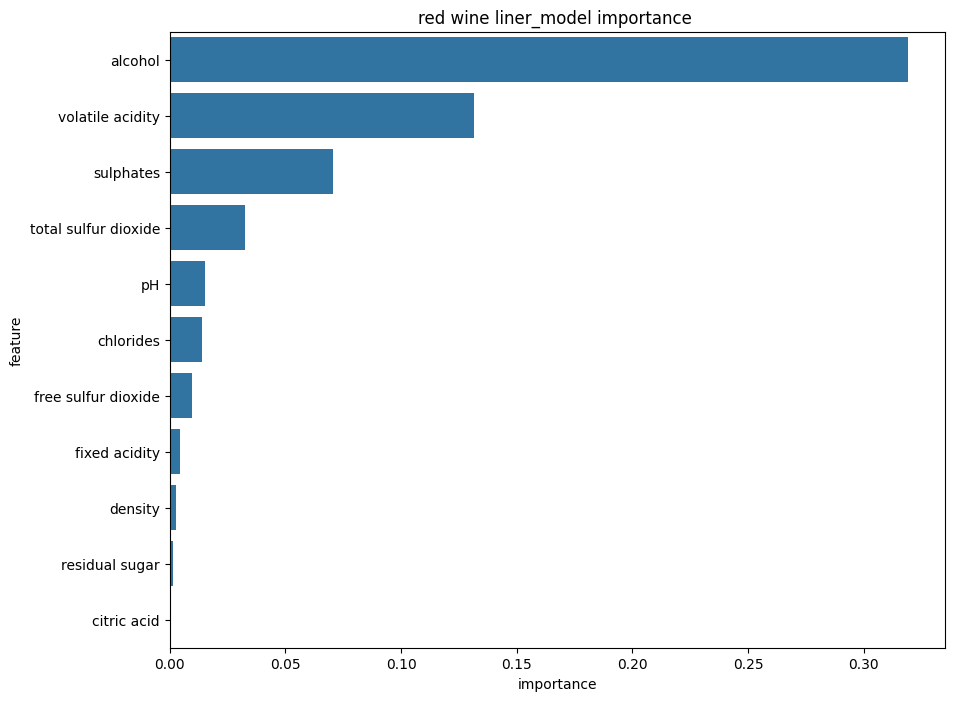

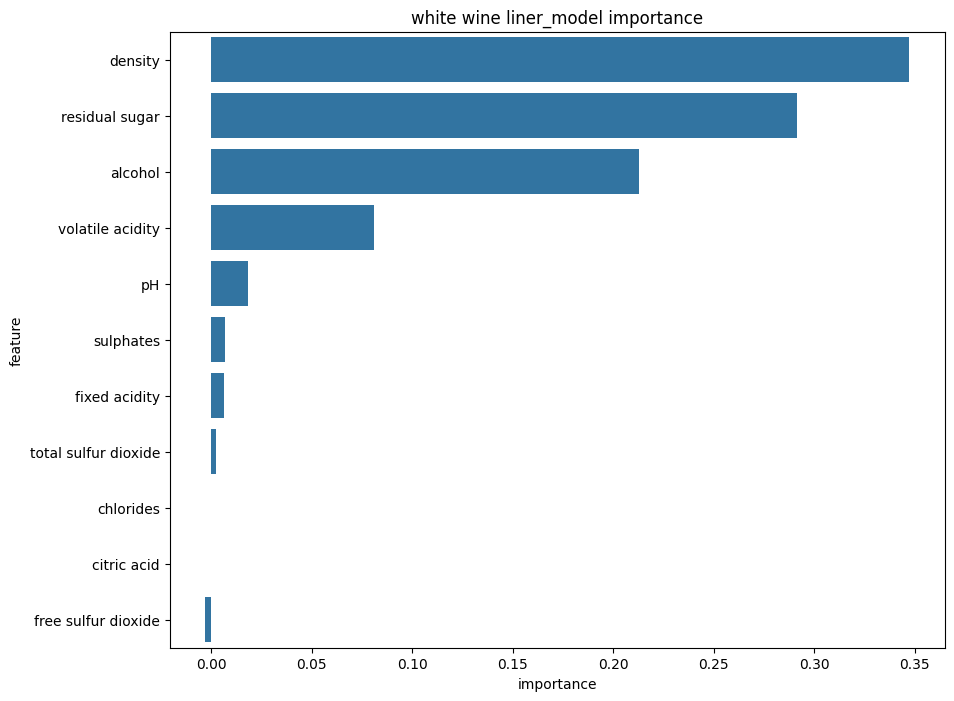

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# ファイルパス
red_wine_path = './WineQuality-RedWine.csv'
white_wine_path = './WineQuality-WhiteWine.csv'

# データの読み込みと前処理
red_wine = pd.read_csv(red_wine_path)
white_wine = pd.read_csv(white_wine_path)

# 欠損値の処理
red_wine = red_wine.fillna(red_wine.mean())
white_wine = white_wine.fillna(white_wine.mean())

# 特徴量とターゲットの分離
X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']
X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

# データの標準化
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

# データの分割
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)

# 線形回帰モデルの学習
model_red = LinearRegression()
model_red.fit(X_train_red, y_train_red)

model_white = LinearRegression()
model_white.fit(X_train_white, y_train_white)

# 赤ワインモデルのPFI計算
pfi_red = permutation_importance(model_red, X_test_red, y_test_red, n_repeats=50, random_state=50)

# 白ワインモデルのPFI計算
pfi_white = permutation_importance(model_white, X_test_white, y_test_white, n_repeats=50, random_state=50)

# 赤ワインの特徴量重要度を表示するためのDataFrameの作成
importance_red = pd.DataFrame({
    'feature': X_red.columns,
    'importance': pfi_red.importances_mean,
    'std_dev': pfi_red.importances_std
})

# 白ワインの特徴量重要度を表示するためのDataFrameの作成
importance_white = pd.DataFrame({
    'feature': X_white.columns,
    'importance': pfi_white.importances_mean,
    'std_dev': pfi_white.importances_std
})

print(importance_red.sort_values(by='importance', ascending=False))
print(importance_white.sort_values(by='importance', ascending=False))

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_red.sort_values(by='importance', ascending=False))
plt.title('red wine liner_model importance ')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_white.sort_values(by='importance', ascending=False))
plt.title('white wine liner_model importance')
plt.show()
